In [1]:
import sys
# sys.path.append(r"Y:\Users\Yingyue\Gates_Lab_Suite-master")
sys.path.append(r"/Users/yzhu/yzhu_work/gates projects")
from Core_Definition import *
from Auto_Algorithm import *
from Visualization import *
import os
from SPAM import *
import numpy as np
import xlsxwriter as xlsx
from scipy import optimize
import random
import math
from math import floor
import pickle
import uuid
sys.path.append(r"/Users/yzhu/yzhu_work/gates projects/EAB")
from EAB_CB_data_analysis import *

In [2]:
import json, pickle
import qiskit
#transpiler reducinig qiskit circuit to QASM strings
from qiskit import transpile
# Use AerSimulator
from qiskit_aer import AerSimulator
from qiskit import IBMQ, QuantumCircuit, execute
# from qiskit.providers.ibmq.managed import IBMQJobManager
from qiskit.extensions import UnitaryGate
from qiskit.quantum_info import Pauli, Clifford, Statevector,Operator
from qiskit.visualization import array_to_latex
from scipy.stats import sem, unitary_group
from scipy.linalg import sqrtm,expm
import qiskit.quantum_info as qi
from qiskit.quantum_info import Pauli
import pylatexenc

/var/folders/6l/f5pw0tyx785dhvmqpb7282h00000gn/T/ipykernel_80685/1375469573.py:9: DeprecationWarning: The qiskit.extensions module is deprecated since Qiskit 0.46.0. It will be removed in the Qiskit 1.0 release.
  from qiskit.extensions import UnitaryGate


In [3]:
def read_circuit_file(pathfilename):
    """
    store circuits in list circuit_list
    """
    circuit_list=[]
    file=open(pathfilename, 'r')
    Lines= file.readlines()
    # c_d2=[]
    count = 0
    for line in Lines:
        circuit_list.append(line)
        count += 1
    # print (count)
    # count=0
    return circuit_list,count

def read_data_file(pathname):
    # paf_data_d2="/Volumes/funkflower/Labs/Gates/Data/2024/202409/20240916/2024-09-16 BT__d=2/"
    L1=[]
    filenames=[]
    filenames_ordered=[]
    line_Idx="000"
    line_num=""
    p=0 #position indicator

    #------------------------------------------read in raw data-------------------------------
    for f in os.listdir(pathname):
        if (f.find("Line")!=-1):
            n=f.find("_")
            line_Idx=f[n+6:n+9]
            for i in range(3):
                if line_Idx[i]=="0":
                    p+=1
                else:
                    line_num=line_Idx[p:3]
                    p=0
                    break
            L1.append(int(line_num))
            filenames.append(f)
        else:
            print (f) #print out non datafiles just for debugging 
            continue
    for Idx in range (len(filenames)):
        for i in range (len(filenames)):
            if L1[i]==Idx+1:
                filenames_ordered.append(filenames[i])
                break
    return filenames_ordered
    

In [4]:
pathname="/Volumes/funkflower/Labs/Gates/AutoAlgorithms/EAB/0917 ancilla err meas FTXX23_01+10/"
c_d2,circuit_count= read_circuit_file(pathname+"d=2.txt")
print (circuit_count)

c_d8,circuit_count= read_circuit_file(pathname+"d=8.txt")
print (circuit_count)

c_d16,circuit_count= read_circuit_file(pathname+"d=16.txt")
print (circuit_count)

c_d32,circuit_count= read_circuit_file(pathname+"d=32.txt")
print (circuit_count)


20
20
20
20


In [8]:
paf_data_d2="/Volumes/funkflower/Labs/Gates/Data/2024/202409/20240917/2024-09-17 EAB_FTXX23_01_d=2/"
paf_data_d8="/Volumes/funkflower/Labs/Gates/Data/2024/202409/20240916/2024-09-16 BT__d=8/"
paf_data_d16="/Volumes/funkflower/Labs/Gates/Data/2024/202409/20240916/2024-09-16 BT__d=16/"
paf_data_d32="/Volumes/funkflower/Labs/Gates/Data/2024/202409/20240916/2024-09-16 BT__d=32/"

filenames_d2=read_data_file(paf_data_d2)
print (len(filenames_d2))
filenames_d4=[]
filenames_d8=read_data_file("/Volumes/funkflower/Labs/Gates/Data/2024/202409/20240916/2024-09-16 BT__d=8/")
filenames_d16=read_data_file("/Volumes/funkflower/Labs/Gates/Data/2024/202409/20240916/2024-09-16 BT__d=16/")
filenames_d32=read_data_file("/Volumes/funkflower/Labs/Gates/Data/2024/202409/20240916/2024-09-16 BT__d=32/")

print (len(filenames_d8))
print (len(filenames_d16))
print (len(filenames_d32))

filenames_d16_goodgates=read_data_file("/Volumes/funkflower/Labs/Gates/Data/2024/202409/20240916/2024-09-16 BT__d=16/good gates/")

4
.DS_Store
good gates
20
20
20


In [9]:
Set_Mapping([2,3,5,4,1])
nqubit=2
C=20

a=Quantum_State(5)
a_s=Quantum_State(5)
b_c=Quantum_Circuit(5,"qc")

spam1=SPAM_Operator(5)
spam1.Import("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/0516 FTXX 13452/spam/spam.csv")

# spam2=SPAM_Operator(5)
# spam2.Import("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/0424/SPAM1/SPAM1.csv")


2024-09-17-200937_Line_001.txt
counts: [51, 35, 119, 13, 16, 4, 62, 4, 27, 27, 1303, 37, 18, 11, 230, 43]
HAD2:RX+51:HAD3:RX+41:RY+22:FTXA250.2500+:RY-22:RX-52:AZ2-0.5000:RY+32:FTXA340.2500+:RY-32:RX-42:AZ3-0.5000:SKAX2+1.0000:AZ3+1.0000:AZ5+1.0000:SKAX4+1.0000:FTXA230.2500+:SKAX3+1.0000:FTXA230.2500+:AZ2+1.0000:SKAY3+1.0000:AZ5-1.0000:SKAX4+1.0000:SKAY2+0.5000:FTXA250.2500+:SKAY2-0.5000:SKAX5-0.5000:AZ2-0.5000:SKAY3+0.5000:FTXA340.2500+:SKAY3-0.5000:SKAX4-0.5000:AZ3-0.5000:HAD2:HAD3

counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 0, 0]


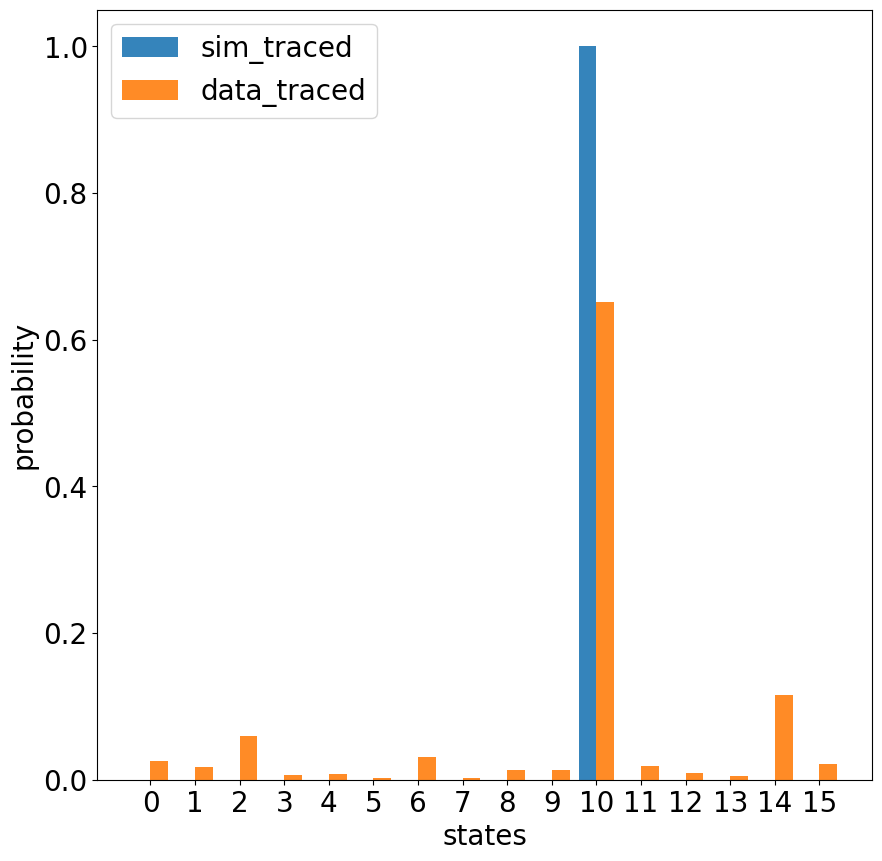

2024-09-17-201005_Line_002.txt
counts: [9, 29, 6, 4, 15, 183, 37, 17, 28, 162, 12, 9, 62, 1314, 59, 54]
HAD2:RX+51:HAD3:RX+41:RY+22:FTXA250.2500+:RY-22:RX-52:AZ2-0.5000:RY+32:FTXA340.2500+:RY-32:RX-42:AZ3-0.5000:AZ2+1.0000:SKAY3+1.0000:SKAY5+1.0000:AZ4+1.0000:FTXA230.2500+:AZ2+1.0000:SKAY3+1.0000:AZ5+1.0000:SKAX4+1.0000:FTXA230.2500+:AZ2+1.0000:SKAY3+1.0000:SKAX5+1.0000:SKAY4+1.0000:SKAY2+0.5000:FTXA250.2500+:SKAY2-0.5000:SKAX5-0.5000:AZ2-0.5000:SKAY3+0.5000:FTXA340.2500+:SKAY3-0.5000:SKAX4-0.5000:AZ3-0.5000:HAD2:HAD3

counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0]


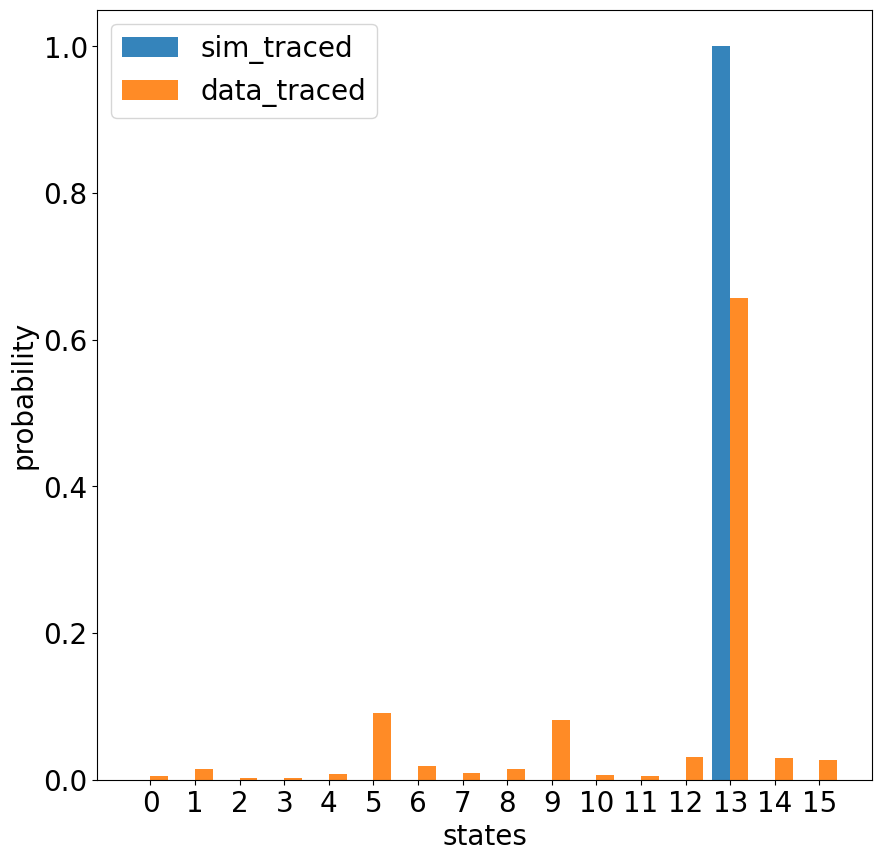

2024-09-17-201032_Line_003.txt
counts: [40, 6, 1511, 37, 4, 6, 132, 27, 70, 26, 107, 5, 6, 4, 16, 3]
HAD2:RX+51:HAD3:RX+41:RY+22:FTXA250.2500+:RY-22:RX-52:AZ2-0.5000:RY+32:FTXA340.2500+:RY-32:RX-42:AZ3-0.5000:AZ3+1.0000:FTXA230.2500+:AZ2+1.0000:SKAX3+1.0000:AZ5+1.0000:SKAY4+1.0000:FTXA230.2500+:AZ2+1.0000:AZ3+1.0000:AZ5-1.0000:SKAY4+1.0000:SKAY2+0.5000:FTXA250.2500+:SKAY2-0.5000:SKAX5-0.5000:AZ2-0.5000:SKAY3+0.5000:FTXA340.2500+:SKAY3-0.5000:SKAX4-0.5000:AZ3-0.5000:HAD2:HAD3

counts sim: [0, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


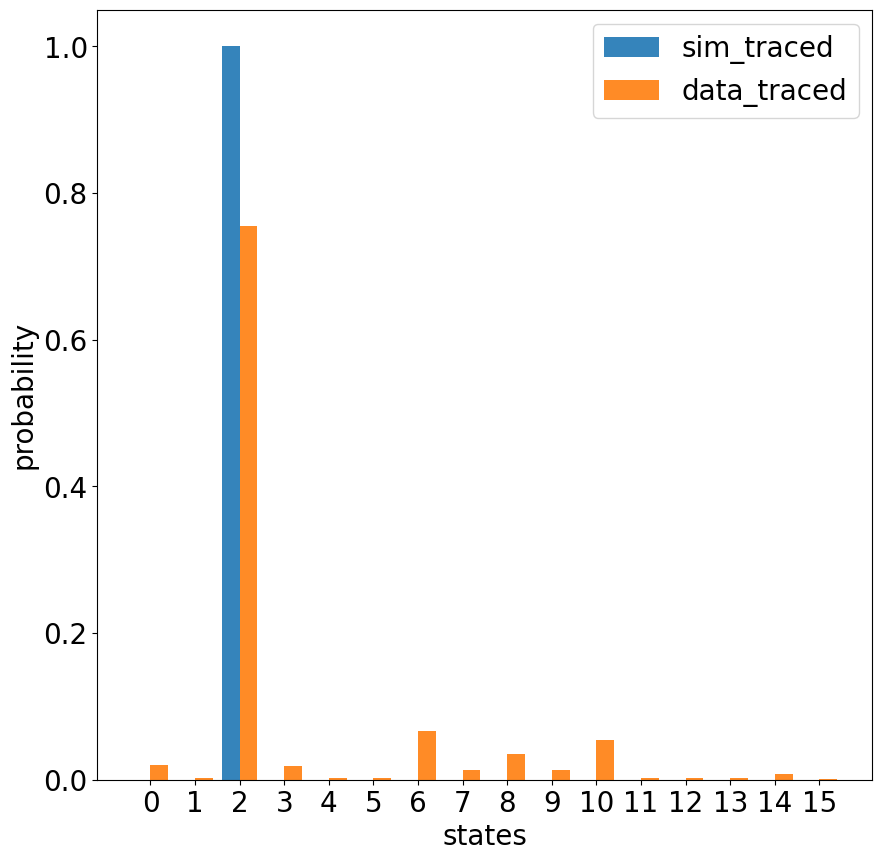

2024-09-17-201100_Line_004.txt
counts: [286, 45, 11, 16, 1431, 42, 21, 24, 15, 7, 3, 13, 57, 7, 10, 12]
HAD2:RX+51:HAD3:RX+41:RY+22:FTXA250.2500+:RY-22:RX-52:AZ2-0.5000:RY+32:FTXA340.2500+:RY-32:RX-42:AZ3-0.5000:SKAY2+1.0000:SKAY4+1.0000:FTXA230.2500+:FTXA230.2500+:SKAY2+1.0000:AZ3+1.0000:SKAY4+1.0000:SKAY2+0.5000:FTXA250.2500+:SKAY2-0.5000:SKAX5-0.5000:AZ2-0.5000:SKAY3+0.5000:FTXA340.2500+:SKAY3-0.5000:SKAX4-0.5000:AZ3-0.5000:HAD2:HAD3

counts sim: [0, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


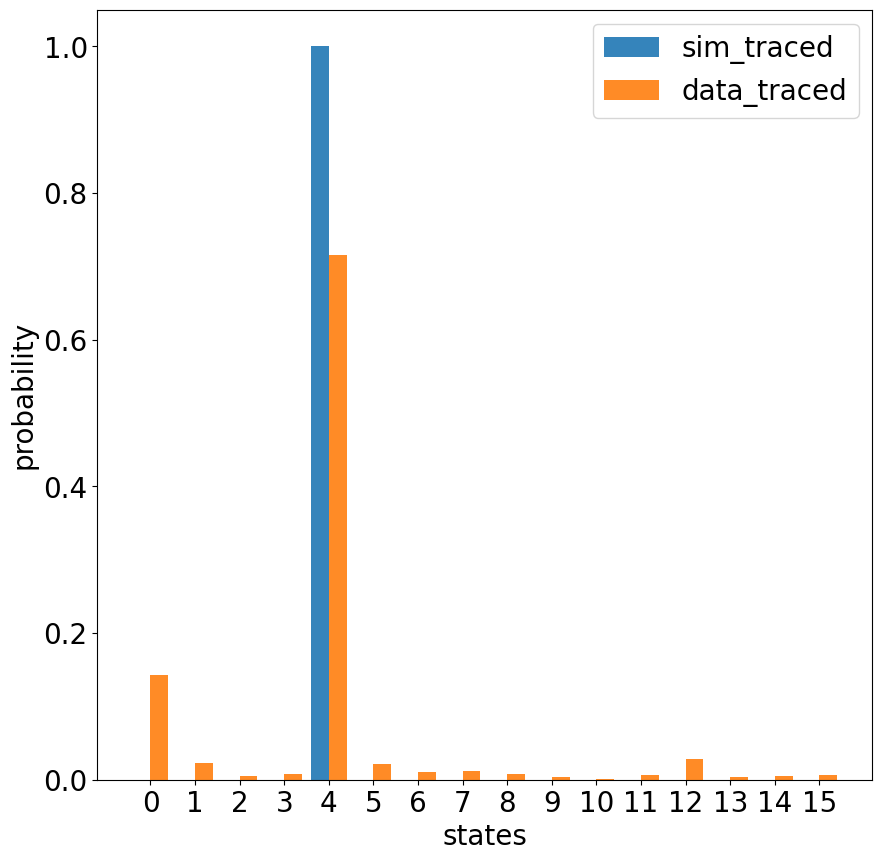

In [10]:

filenames_data=[]
counts_d2=[]
counts_d2_spam=[]
shots=2000
counts=[]
counts_spam=[]
filenames_data=filenames_d2.copy()
# print (filenames_data)
# print (len(filenames_data))
paf_data=paf_data_d2
circuit=c_d2
for i in range (len(filenames_data)):
    print (filenames_data[i])
    a.Import(paf_data+filenames_data[i],keep_file=True)
    data_traced=Trace_Out(a,[0,1,2,3])
    counts=[round(shots*x) for x in  data_traced.population]
    print ("counts:", counts)
    counts_ibm_mapping, counts_ibm_mapping_dic=map_statepop_2_ibm_mapping(counts,nqubit)
    # print ("counts_ibm_mapping_dic:",counts_ibm_mapping_dic)
    counts_d2.append(counts_ibm_mapping_dic)
    
    # a_s=spam1.Correct_SPAM(a)
    # data_traced_spam=Trace_Out(a_s,[0,1,2,3])
    # counts_spam=[round(shots*x) for x in  data_traced_spam.population]
    # counts_ibm_mapping_spam, counts_ibm_mapping_dic_spam=map_statepop_2_ibm_mapping(counts_spam,nqubit)
    # counts_d2_spam.append(counts_ibm_mapping_dic_spam)

    b_c.Interpret_GatesLab_Sequence(circuit[i])
    print (circuit[i])
    b=b_c.Simulate()
    sim_traced=Trace_Out(b,[0,1,2,3])
    counts_sim=[round(shots*x) for x in  sim_traced.population]
    print ("counts sim:", counts_sim)
    Display_States_Population(states=[sim_traced,data_traced],label=["sim_traced","data_traced"])
        

In [41]:
filenames_data=[]
counts_d8=[]
counts_d8_spam=[]
counts=[]
counts_spam=[]
filenames_data=filenames_d8.copy()
# print (filenames_data)
# # print (len(filenames_data))
paf_data=paf_data_d8
circuit=c_d8
for i in range (len(filenames_data)):
    print (filenames_data[i])
    a.Import(paf_data+filenames_data[i],keep_file=True)
    data_traced=Trace_Out(a,[0,1,2,3])
    counts=[round(shots*x) for x in  data_traced.population]
    # counts=[round(shots*x) for x in  data_traced.population]
    print ("counts:", counts)
    counts_ibm_mapping, counts_ibm_mapping_dic=map_statepop_2_ibm_mapping(counts,nqubit)
    counts_d8.append(counts_ibm_mapping_dic)
    
    
    b_c.Interpret_GatesLab_Sequence(circuit[i])
    # print (circuit[i])
    b=b_c.Simulate()
    sim_traced=Trace_Out(b,[0,1,2,3])
    sim_traced=Trace_Out(b,[0,1,2,3])
    counts_sim=[round(shots*x) for x in  sim_traced.population]
    print ("counts sim:", counts_sim)

    # Display_States_Population(states=[sim_traced,data_traced,data_traced_spam],label=["sim_traced","data_traced","spam_traced"])

2024-09-16-144135_Line_001.txt
counts: [44, 5, 7, 23, 189, 15, 41, 11, 205, 17, 17, 29, 1234, 96, 54, 13]
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0]
2024-09-16-144223_Line_002.txt
counts: [39, 3, 8, 7, 373, 19, 46, 39, 112, 24, 18, 20, 1142, 51, 57, 42]
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0]
2024-09-16-144310_Line_003.txt
counts: [14, 8, 85, 4, 34, 44, 178, 13, 32, 35, 364, 16, 58, 36, 1021, 58]
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0]
2024-09-16-144400_Line_004.txt
counts: [26, 12, 376, 24, 61, 143, 1012, 67, 5, 12, 44, 6, 23, 61, 108, 20]
counts sim: [0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2024-09-16-144450_Line_005.txt
counts: [288, 11, 44, 71, 88, 7, 14, 15, 1034, 35, 53, 107, 174, 9, 18, 32]
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0]
2024-09-16-144536_Line_006.txt
counts: [154, 12, 40, 59, 86, 9, 28, 28, 1012, 51, 49, 89, 302, 29, 19, 33]
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 2000,

In [42]:
filenames_data=[]
counts_d16=[]
counts_d16_spam=[]
counts=[]
counts_spam=[]
filenames_data=filenames_d16.copy()
# print (filenames_data)
# # print (len(filenames_data))
paf_data=paf_data_d16
circuit=c_d16
for i in range (len(filenames_data)):
    print (filenames_data[i])
    a.Import(paf_data+filenames_data[i],keep_file=True)
    data_traced=Trace_Out(a,[0,1,2,3])
    counts=[round(shots*x) for x in  data_traced.population]
    print ("counts:", counts)
    counts_ibm_mapping, counts_ibm_mapping_dic=map_statepop_2_ibm_mapping(counts,nqubit)
    counts_d16.append(counts_ibm_mapping_dic)
    
    
    b_c.Interpret_GatesLab_Sequence(circuit[i])
    # print (circuit[i])
    b=b_c.Simulate()
    sim_traced=Trace_Out(b,[0,1,2,3])
    sim_traced=Trace_Out(b,[0,1,2,3])
    counts_sim=[round(shots*x) for x in  sim_traced.population]
    print ("counts sim:", counts_sim)
    # Display_States_Population(states=[sim_traced,data_traced,data_traced_spam],label=["sim_traced","data_traced","spam_traced"])

2024-09-16-145136_Line_001.txt
counts: [253, 40, 39, 126, 675, 105, 73, 254, 58, 14, 19, 44, 126, 30, 29, 115]
counts sim: [0, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2024-09-16-145248_Line_002.txt
counts: [38, 213, 90, 33, 13, 50, 44, 12, 80, 692, 360, 68, 45, 131, 104, 27]
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 0]
2024-09-16-170026_Line_003.txt
counts: [114, 56, 69, 937, 99, 28, 25, 237, 57, 32, 21, 205, 28, 12, 12, 68]
counts sim: [0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2024-09-16-145513_Line_004.txt
counts: [306, 24, 39, 93, 97, 20, 18, 81, 661, 49, 47, 147, 229, 41, 24, 124]
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0]
2024-09-16-150306_Line_005.txt
counts: [94, 20, 22, 41, 241, 20, 37, 110, 235, 36, 27, 108, 728, 50, 66, 165]
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0]
2024-09-16-150422_Line_006.txt
counts: [85, 36, 21, 83, 88, 30, 18, 137, 92, 39, 45, 334, 180, 89, 69, 654]
counts sim: [0, 0, 0, 0, 

In [43]:
filenames_data=[]
counts_d32=[]
counts=[]
counts_spam=[]
filenames_data=filenames_d32.copy()
# print (filenames_data)
# # print (len(filenames_data))
paf_data=paf_data_d32
circuit=c_d32
for i in range (len(filenames_data)):
    print (filenames_data[i])
    a.Import(paf_data+filenames_data[i],keep_file=True)
    data_traced=Trace_Out(a,[0,1,2,3])
    counts=[round(shots*x) for x in  data_traced.population]
    counts_ibm_mapping, counts_ibm_mapping_dic=map_statepop_2_ibm_mapping(counts,nqubit)
    counts_d32.append(counts_ibm_mapping_dic)
    
    
    b_c.Interpret_GatesLab_Sequence(circuit[i])
    # print (circuit[i])
    b=b_c.Simulate()
    sim_traced=Trace_Out(b,[0,1,2,3])
    sim_traced=Trace_Out(b,[0,1,2,3])
    counts_sim=[round(shots*x) for x in  sim_traced.population]
    print ("counts sim:", counts_sim)
    # Display_States_Population(states=[sim_traced,data_traced],label=["sim_traced","data_traced"])

2024-09-16-151340_Line_001.txt
counts sim: [0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2024-09-16-151605_Line_002.txt
counts sim: [0, 2000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2024-09-16-151834_Line_003.txt
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0]
2024-09-16-152055_Line_004.txt
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0]
2024-09-16-152434_Line_005.txt
counts sim: [0, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2024-09-16-152657_Line_006.txt
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 0]
2024-09-16-152918_Line_007.txt
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0]
2024-09-16-153138_Line_008.txt
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 0]
2024-09-16-153511_Line_009.txt
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 0]
2024-09-16-153739_Line_010.txt
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0]
2024-09-16-154005_Line_011.txt
counts sim: [0, 0, 

In [44]:
import copy
from copy import copy, deepcopy

# copy.copy(x)
# copy.deepcopy(x)

# picklefile="c39b72eb-9de9-4338-b6ae-e478130a3f4fXX23541withpadding_set2"
with open("/Users/yzhu/yzhu_work/gates projects/EAB/circuits/0911 ancilla err meas expli CNOT FTXX13/03481c90-d355-4c90-b25b-aefbff22edccancilla_error_meas_expli_09112024", "rb") as fp:   # Unpickling
    eab_load = pickle.load(fp)
# print (picklefile)
# print (b)

# with open("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/circuits/23541 EAB XX C=10 0424 /"+picklefile, "rb") as fp:   # Unpickling
#     eab_load_2 = pickle.load(fp)
# print (picklefile)

# with open("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/circuits/23541 EAB XX C=10 0424 /"+picklefile, "rb") as fp:   # Unpickling
#     eab_load_3 = pickle.load(fp)
# print (picklefile)


C=20
eab_load_cpy=deepcopy(eab_load)
eab_load_cpy_spam=deepcopy(eab_load)
# eab_load_cpy_24=deepcopy(eab_load[0:20]) #a copy that only has depth=[2,4]


In [45]:
for i in range (C):
#     print (i)
    assert eab_load_cpy[i]["L"]==2
    eab_load_cpy[i]["counts"]=counts_d2[i].copy()


for i in range (2*C,3*C):
#     print (i)
    assert eab_load_cpy[i]["L"]==8
    eab_load_cpy[i]["counts"]=counts_d8[i-2*C].copy()

for i in range (3*C,4*C):
#     print (i)
    assert eab_load_cpy[i]["L"]==16
    eab_load_cpy[i]["counts"]=counts_d16[i-3*C].copy()
#     print ( eab_load_cpy[i]["counts_exp"])
#     print (eab_load_cpy[i])

for i in range (4*C,5*C):
#     print (i)
    assert eab_load_cpy[i]["L"]==32
    eab_load_cpy[i]["counts"]=counts_d32[i-4*C].copy()
#     print ( eab_load_cpy[i]["counts_exp"])
#     print (eab_load_cpy[i])


In [23]:
# print (eab_load_cpy)
# filename = str(uuid.uuid4())
# filename+="FTXX13_mapping1345_R_0516_00+11_ExperimentalData"
# with open("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/0516 FTXX 13452/13452 explicit CNOT FT R/results/"+filename, "wb") as fp:
#     pickle.dump(eab_load_cpy, fp)


In [46]:
sys.path.append(r"/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation")
import EAB_process_modified 
import itertools
import pdb

'''Specify a set of Pauli you want to estimate'''
# C=10
C=20
nqubit=2
depth=[2,4,8,16,32]
pauli_request_list = [''.join(s) for s in itertools.product(['I','X','Y','Z'], repeat = nqubit)] #full

#process_EAB(Lrange, cb_data, pauli_request_list)
eab_result=EAB_process_modified.process_EAB(depth, eab_load_cpy, pauli_request_list)
# eab_result_spam=EAB_process_modified.process_EAB(depth, eab_load_cpy_spam, pauli_request_list)

print (eab_result)


{'fidelity_list': {'II': {2: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 4: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 8: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 16: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 32: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}, 'IX': {2: [0.536, 0.773, 0.792, 0.468, 0.688, 0.781, 0.563, 0.807, 0.728, 0.634, 0.817, 0.73, 0.732, 0.575, 0.817, 0.797, 0.801, 0.782, 0.581, 0.829], 4: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 8: [0.665, 0.466, 0.62, 0.721, 0.462, 0.584, 0.254, 0.586, 0.678, 0.42, 0.423, 0.679, 0.416, 0.468, 0.694, 0.452, 0.394, 0.691, 0.494, 0.597], 16: [0.565, 0.507, 0.565, 0.322, 0.415, 0.502, 

In [39]:
from scipy.optimize import curve_fit
def rcs_fit_fun_depth1(x, alpha):
        #return a * np.exp(-alpha * x)
        return alpha ** x

def fit_EAB_depth1(X, xeb_list):
    Y = [np.mean(xeb_list[L]) for L in X]
    Yerr = [sem(xeb_list[L]) for L in X]
    #print(linregress(X,np.log(Y)))
    
    
    try:
        params, pcov = curve_fit(rcs_fit_fun_depth1, X, Y, sigma=Yerr, absolute_sigma=True, p0=[1])
        alpha = params[0]
        params_err = np.sqrt(np.diag(pcov))
        alpha_err = params_err[0]

    except RuntimeError:
        alpha = 1.0
        alpha_err = 0.0


    return alpha, alpha_err

    print(alpha, alpha_err)

In [47]:
raw_fidelity_list = eab_result["fidelity_list"]

#######depth=[2]#########
##########################
plot_dic={}
error_dic={}
err=[]
# sys.exit(0)
depth=[2,8,16,32]
fidelity_list = {}
stdev_list = {}

for pauli_label in pauli_request_list:
    if(pauli_label == 'I'*nqubit):
        fidelity_list[pauli_label] = 1.0
        stdev_list[pauli_label] = 0.0
    else:
        alpha, alpha_err = fit_EAB_depth1(depth, raw_fidelity_list[pauli_label])
        fidelity_list[pauli_label] = alpha
        stdev_list[pauli_label] = alpha_err

# print(fidelity_list)

# print(stdev_list)

print("Parameters: n = %d, C = %d, " % (nqubit,C), "L = ", str(depth))
use_density_matrix=False
use_readout_error =False
shots=2000
if use_density_matrix:
    print("Density matrix based simulation")
else:
    print("Measurement based simulation, shots = %d" % shots)

if use_readout_error is True:
    print("Measurement bitflip rate = %f" % eps_readout)
else:
    print("No readout error")

# Average fidelity
print("Total error = ", 1-np.mean(list(fidelity_list.values())))

print("Label / Pauli infidelity / Standard deviation")
for pauli_label in pauli_request_list:
    print(pauli_label[::-1], 1-fidelity_list[pauli_label], stdev_list[pauli_label])
# print('Effective noise rate = ' + str(1-np.average(list(fidelity_list.values()))))
    plot_dic[pauli_label[::-1]]=1-fidelity_list[pauli_label]
    error_dic[pauli_label[::-1]]=stdev_list[pauli_label]
# print('Effective noise rate = ' + str(1-np.average(list(fidelity_list.values()))))



Parameters: n = 2, C = 20,  L =  [2, 8, 16, 32]
Measurement based simulation, shots = 2000
No readout error
Total error =  0.09409871099156009
Label / Pauli infidelity / Standard deviation
II 0.0 0.0
XI 0.06387621451849623 0.002656208298872291
YI 0.10110747494809735 0.0048824450966363075
ZI 0.056500292464875645 0.00155924704755761
IX 0.05675459121886817 0.0021939446686729943
XX 0.1281131980932031 0.0042699106596589
YX 0.1839338237597007 0.0075290398691558146
ZX 0.09863025508861412 0.004641627404130634
IY 0.09895048474151535 0.004695684758764218
XY 0.1876176584637036 0.0074260352007960205
YY 0.1693738739360514 0.005709954646196225
ZY 0.08295556456550934 0.002723787075494204
IZ 0.05301940478165024 0.0017794181000660408
XZ 0.10503432422811743 0.004755591516828222
YZ 0.08774880096764015 0.0031658962052731675
ZZ 0.03196341408891923 0.0006081009284629563


In [33]:
error_list = fidelity_to_error(fidelity_list,nqubit)
print("Label / Pauli error rates")
for pauli_label in pauli_request_list:
    print(pauli_label[::-1], round(error_list[pauli_label],7))


Label / Pauli error rates
II 0.9062997
XI 0.0073413
YI 0.000296
ZI 0.0338169
IX 0.007867
XX 0.0165796
YX 0.000342
ZX -0.0009905
IY -0.0008928
XY 4.07e-05
YY 0.0024546
ZY 0.0011504
IZ 0.0313286
XZ -0.0004876
YZ 0.0016875
ZZ -0.0068335


# error mitigation : mitigate ancilla error 

In [65]:
pauli_fidelity_anc_square=np.load("II_fidelity.npy",allow_pickle=True)
pauli_fidelity_anc_square=pauli_fidelity_anc_square.item()
print (pauli_fidelity_anc_square)

{'II': 1.0, 'IX': 0.9139531132292242, 'IY': 0.9061741058345074, 'IZ': 0.9938635921658188, 'XI': 0.9329187571327998, 'XX': 0.8106655466323018, 'XY': 0.7905624823753081, 'XZ': 0.924974179799397, 'YI': 0.9301514702306476, 'YX': 0.7847948640032492, 'YY': 0.7672538346178901, 'YZ': 0.9207696816698406, 'ZI': 0.9946885846609881, 'ZX': 0.9032740974114747, 'ZY': 0.8934030474965521, 'ZZ': 0.989063266712585}


In [70]:
pauli_fidelity_anc=deepcopy(pauli_fidelity_anc_square)
for pauli in pauli_fidelity_anc:
    pauli_fidelity_anc[pauli]=np.sqrt(pauli_fidelity_anc[pauli])
    # print (pauli)
print(pauli_fidelity_anc)

{'II': 1.0, 'IX': 0.9560089503917965, 'IY': 0.9519317758298161, 'IZ': 0.9969270746477993, 'XI': 0.9658771956790365, 'XX': 0.9003696722082002, 'XY': 0.8891358064858866, 'XZ': 0.9617557797067804, 'YI': 0.9644436065580235, 'YX': 0.8858864848293201, 'YY': 0.875930268125203, 'YZ': 0.9595674450865038, 'ZI': 0.9973407565426112, 'ZX': 0.9504073323641157, 'ZY': 0.9452000039655903, 'ZZ': 0.9945165995158578}


In [72]:
mitigate_eab_fidelity=deepcopy(fidelity_list)
for pauli in mitigate_eab_fidelity:
    mitigate_eab_fidelity[pauli]=mitigate_eab_fidelity[pauli]/pauli_fidelity_anc[pauli]

In [75]:
for pauli_label in pauli_request_list:
    print(pauli_label[::-1], mitigate_eab_fidelity[pauli_label])

II 1.0
XI 0.9791998130329813
YI 0.9442825083429133
ZI 0.9464079485136362
IX 0.9765686704281346
XX 0.968365360161957
YX 0.9178194942633354
ZX 0.9372127144234007
IY 0.9342687422380409
XY 0.9170275824817608
YY 0.9482788257126664
ZY 0.9556852310176281
IZ 0.9495055616709775
XZ 0.9416653736726511
YZ 0.9651409174830791
ZZ 0.9733739852932894


In [76]:
error_list = fidelity_to_error(pauli_fidelity_anc,nqubit)
print("Label / Pauli error rates")
for pauli_label in pauli_request_list:
    print(pauli_label[::-1], round(error_list[pauli_label],7))

Label / Pauli error rates
II 0.9497062
XI 0.0028356
YI -0.0009737
ZI 0.0303474
IX 0.0030446
XX -2.24e-05
YX -4.08e-05
ZX -0.0019582
IY -0.0008692
XY -8.78e-05
YY 0.0002132
ZY 0.0010502
IZ 0.0243354
XZ -0.0009379
YZ 0.0005503
ZZ -0.0071928
